## Question 1
>(80 points) Train and validate your own n-layer Neural Network on the Apparel dataset to predict the class label of a given apparel. You are free to choose the hyper-parameters, training strategy to handle large number of training data (Hint: Batch Size) architecture - number of hidden layers, number of nodes in each hidden layer etc.

##### Description of Apparel dataset:
    The dataset contains 60,000 examples - each example is a 28x28 grayscale image, belonging to one of the 10 following class labels.
    Class labels:
        Label	Description
            0	T-shirt/top
            1	Trouser
            2	Pullover
            3	Dress
            4	Coat
            5	Sandal
            6	Shirt
            7	Sneaker
            8	Bag
            9	Ankle boot

    Represntation of images in the dataset:
        The images are flattened to represent them as a row - each row consisting of 28*28 = 784 values. Each value reprsents a pixel
        of the image. To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers 
        between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix. For example, pixel31 indicates the pixel that 
        is in the fourth column from the left, and the second row from the top.

    Dataset format:
        The first row represnts the heading. Rests are the examples.
        Each row, having 785 columns, in the CSV file represents one example. The first column reprsents the label of the image.
        The rest of the 784 columns are the pixel values.
        
        The sample dataset format:
            label,pixel1,pixel2,pixel3, ... ,pixel784
            4,0,0,0,0,0,0,1,1,0,0,21,153,100,88,81,130,...,156
            2,0,0,0,0,0,0,1,0,0,0,12,111,32,10,5,79,34,...,0
            .
            .
            .

###### Load the dataset :

In [1]:
import pandas as pd
df = pd.read_csv("Apparel/apparel-trainval.csv")

df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###### PREPROCESSING:
> Remove Labels

In [2]:
labels = df["label"]
df = df.iloc[:,1:]
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###### PREPROCESSING:
>Standardization of the Dataset

In [3]:
from sklearn.exceptions import DataConversionWarning
import warnings
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

from sklearn.preprocessing import StandardScaler
df = StandardScaler().fit_transform(df)

###### PREPROCESSING:
> One Hot Encode Labels

In [4]:
import numpy as np
num_classes = 10
targets = np.array([labels]).reshape(-1)
one_hot_targets = np.eye(num_classes)[labels]

###### NEURAL NETWORK : 

In [243]:
import numpy as np
import math



class Layer_Details:
    def __init__(self, nodes_in_this_layer, nodes_in_next_layer, activation_func):
        ###### --------------store details in each layers-----------------######
        self.nodes_in_this_layer = nodes_in_this_layer
        self.activation_func = activation_func
        self.activations = np.zeros([nodes_in_this_layer,1])
        
        if nodes_in_next_layer == 0 :
            self.weights = None
            self.bias = None
        else:
            self.weights = np.random.rand(nodes_in_this_layer, nodes_in_next_layer) * math.sqrt(2/nodes_in_this_layer)
            self.bias = np.random.rand(1, nodes_in_next_layer)



class Neural_NET:
    def __init__(self, num_of_layers, nodes_in_layers, activation_func , cost_func, test_plot = False, test_data=None,test_labels=None):
        ########             initialise hyperparameters               #########
        
        self.num_of_layers = num_of_layers
        self.nodes_in_layers = nodes_in_layers
        self.cost_func = cost_func
        self.Layers = []
        self.test_plot = test_plot
        self.train_accuracy=[]
        self.test_accuracy=[]
        self.epochs=[]
        self.test_data = test_data
        self.test_labels = test_labels
        
        #######              test correctness of the parameters        ########
        
        if num_of_layers != len(nodes_in_layers):
            raise ValueError("check your parameters, ambiguity is sizes!")
        
        #######              storing the details in each layer         #########
        
        for i in range(len(nodes_in_layers)):
            if i+1 == len(nodes_in_layers):
                if type(activation_func) == list:
                    layer = Layer_Details(nodes_in_layers[i], 0 ,activation_func[i])
                else:
                    layer = Layer_Details(nodes_in_layers[i], 0 ,activation_func)

            else : 
                if type(activation_func) == list:
                    layer = Layer_Details(nodes_in_layers[i],nodes_in_layers[i+1],activation_func[i])
                else:
                    layer = Layer_Details(nodes_in_layers[i],nodes_in_layers[i+1],activation_func)

            self.Layers.append(layer)
        
    def relu(self, Z):
        Z = np.maximum(Z,0)
        return np.nan_to_num(Z)
    
    def sigmoid(self, Z):
        return np.divide(1, np.add(1, np.exp(np.negative(Z))))
    
    def tanh(self, Z):
        return np.tanh(Z)
    
    def softmax(self, x):
        exp = np.nan_to_num(np.exp(x))
        if isinstance(x[0], np.ndarray):
            return np.nan_to_num(exp/np.sum(exp, axis=1, keepdims=True))
        else:
            return np.nan_to_num(exp/np.sum(exp, keepdims=True))
        
        
    def sig_derivative(self, X):
        return np.multiply(X,1-X)
    
    def reluDerivative(self,x):
        x = np.where(x>=0,1,0)
        return x.astype('int')
    def tanhDerivative(self, Z):
        a = np.tanh(Z)
        return 1-a**2
    
    
    #----------------------forward propagation with different activation functions------------------------#
    
    def forward_pass(self, data):
        self.Layers[0].activations = data
        for i in range(self.num_of_layers-1):
            Z_i = np.add(np.matmul(self.Layers[i].activations , self.Layers[i].weights),self.Layers[i].bias)
            if self.Layers[i+1].activation_func == "sigmoid":
                self.Layers[i+1].activations = self.sigmoid(Z_i)
                self.Layers[i+1].Z = Z_i
            elif self.Layers[i+1].activation_func == "tanh":
                self.Layers[i+1].activations = self.tanh(Z_i)
                self.Layers[i+1].Z = Z_i
            elif self.Layers[i+1].activation_func == "relu":
                self.Layers[i+1].activations = self.relu(Z_i)
                self.Layers[i+1].Z = Z_i
            elif self.Layers[i+1].activation_func == "softmax":
                self.Layers[i+1].activations = self.softmax(Z_i)
                self.Layers[i+1].Z = Z_i
            else:
                self.Layers[i+1].activations = Z_i
                self.Layers[i+1].Z = Z_i
                
                

    
    #-----------------------------back-propagation with different activation function----------------------------#
    
    def backward_pass(self,labels):
        i = self.num_of_layers-1
        y_hat = self.Layers[i].activations
        del_b = y_hat - labels
        del_w = np.dot(np.asarray(self.Layers[i-1].activations).T,del_b)
        new_weights = self.Layers[i-1].weights - (self.lr/labels.shape[0]) * del_w
        new_bias = self.Layers[i-1].bias - self.lr * np.mean(del_b,axis=0)
        for i in range(i-1,0,-1):
            y_hat = self.Layers[i].activations
            if self.Layers[i].activation_func == "sigmoid" or self.Layers[i].activation_func == "softmax":
                del_b = np.nan_to_num(np.multiply(np.dot(del_b , new_weights.T),np.nan_to_num(np.multiply(y_hat,1-y_hat))))
            elif self.Layers[i].activation_func == "relu":
                del_b = np.nan_to_num(np.multiply(np.dot(del_b , new_weights.T) ,self.reluDerivative(self.Layers[i].Z)))
            elif self.Layers[i].activation_func == "tanh":
                del_b = np.nan_to_num(np.multiply(np.dot(del_b, new_weights.T), self.tanhDerivative(self.Layers[i].Z)))
#                 print(del_b.shape)
#                 input()
            del_w = np.dot(self.Layers[i-1].activations.T, del_b)
            self.Layers[i].weights = new_weights
            self.Layers[i].bias = new_bias
            new_weights = self.Layers[i-1].weights - (self.lr/labels.shape[0]) * del_w
            new_bias = self.Layers[i-1].bias - self.lr * np.mean(del_b,axis=0)
        self.Layers[0].weights = new_weights
        self.Layers[0].bias = new_bias
        
    #--------------------------------------------Calculate cost-----------------------------------------------# 
    
    def error_calulation(self, labels):
        if self.cost_func == "mean_sqaured":
            self.error += np.mean(np.divide(np.square(np.substract(labels, self.Layers[-1].activations)) , 2))
        elif self.cost_func == "cross_entropy":
            self.error += -np.sum(labels*np.nan_to_num(np.log(self.Layers[-1].activations+1e-9)))

    #-----------------------------------check error in provided training details---------------------------------#
    
    def check_data(self, batch_size, training_data , labels):
        self.batch_size = batch_size
        if training_data.shape[0] % batch_size != 0 :
            raise ValueError("input size is not multiple of batch size!")
        if training_data.shape[1] != self.nodes_in_layers[0]:
            raise ValueError("input dimension doesn't match with nodes in input layer!")
        if labels.shape[1] != self.nodes_in_layers[-1]:
            raise ValueError("output layer size mismatch!")
            
    #-------------------------------------Train the neural network---------------------------------------------#
    
    def train(self, batch_size, training_data, labels, epochs, learning_rate):
        self.lr = learning_rate
        self.batch_size = batch_size
        self.check_data(self.batch_size,training_data,labels)       
        for i in range(epochs):
            j=0
            print("EPOCHS: ", i+1, "of ", epochs, "==")
            while j+batch_size <= len(training_data):
                print("training with ", j+batch_size+1 ,"of ", len(training_data),end='\r' )
                self.error = 0
                self.forward_pass(training_data[j:j+batch_size])
                self.error_calulation(labels[j:j+batch_size])
                self.backward_pass(labels[j:j+batch_size])
                j=j+batch_size
            self.error = self.error/batch_size
            print("\nError = ", self.error)
            if self.test_plot == True:
                self.train_accuracy.append(self.check_accuracy(training_data,labels))
                self.test_accuracy.append(self.check_accuracy(self.test_data,test_labels))
                self.epochs.append(i+1)
                
                   
    #-----------------------------------predict output for test data ---------------------------------#
    def predict(self, inputs):
        self.batch_size = 1
        self.forward_pass(inputs)
        a = self.Layers[self.num_of_layers-1].activations
#         a[np.where(a==np.max(a))] = 1
#         a[np.where(a!=np.max(a))] = 0
#         print(a)
#         a = np.where(a==np.max(a),1,0)
        b = np.zeros_like(a)
        b[np.arange(len(a)), a.argmax(1)] = 1
        return b

    
    #-------------------------------check accuracy of your trained model---------------------------#
    def check_accuracy(self, inputs, labels):
        self.batch_size = len(inputs)
        self.forward_pass(inputs)
        a = self.Layers[self.num_of_layers-1].activations
        b=np.zeros_like(a)
        b[np.arange(len(a)), a.argmax(1)] = 1
        total=0
        correct=0
        for i in range(len(b)):
            total += 1
            if np.equal(b[i], labels[i]).all():
                correct += 1
        return correct*100/total
            
            
            
        

            
        

##### training with two hidden layers of size 20
used ReLU and sigmoid in 2 hidden layers, softmax at output layers

In [153]:
##      training the neural network

net =Neural_NET(4, [784,20, 20,10], ["relu","relu","sigmoid","softmax"], cost_func="cross_entropy")
net.train(128,df[0:51200], labels=one_hot_targets[0:51200], epochs=40, learning_rate=0.1)

EPOCHS:  1 of  40 ==
training with  51201 of  51200
Error =  2.1621408639616484
EPOCHS:  2 of  40 ==
training with  51201 of  51200of  51200
Error =  1.8069053010720395
EPOCHS:  3 of  40 ==
training with  51201 of  51200 of  51200 51200
Error =  1.072620967375528
EPOCHS:  4 of  40 ==
training with  51201 of  51200
Error =  0.709027340523882
EPOCHS:  5 of  40 ==
training with  51201 of  51200
Error =  0.5435559701060849
EPOCHS:  6 of  40 ==
training with  51201 of  51200
Error =  0.49076069413246304
EPOCHS:  7 of  40 ==
training with  51201 of  51200
Error =  0.4514620798157516
EPOCHS:  8 of  40 ==
training with  51201 of  51200
Error =  0.4287402783858153
EPOCHS:  9 of  40 ==
training with  51201 of  51200
Error =  0.41176355612353227
EPOCHS:  10 of  40 ==
training with  51201 of  51200
Error =  0.39074423072592235
EPOCHS:  11 of  40 ==
training with  51201 of  5120022401 of  51200
Error =  0.3729302375833301
EPOCHS:  12 of  40 ==
training with  51201 of  51200
Error =  0.3628477561150

testing accuracy of unseen data

In [154]:
df_test = df[51200:60000]
test_labels = one_hot_targets[51200:60000]
df_test.shape
pred = net.predict(df_test)
print(net.check_accuracy(df_test,test_labels))

86.30681818181819


Accuracy is 86.3% with this architechture. Lets see if we can make it better

In [177]:
net = Neural_NET(4, [784,20, 20,10], ["relu","relu","sigmoid","softmax"], cost_func="cross_entropy",test_plot=True,test_data=df_test,test_labels=test_labels)
net.train(128,df[0:51200], labels=one_hot_targets[0:51200], epochs=70, learning_rate=0.1)

EPOCHS:  1 of  70 ==
training with  51201 of  5120024065 of  51200
Error =  2.210905341892505
EPOCHS:  2 of  70 ==
training with  51201 of  5120032769 of  51200
Error =  1.7701337329289637
EPOCHS:  3 of  70 ==
training with  51201 of  51200
Error =  1.0411681953749552
EPOCHS:  4 of  70 ==
training with  51201 of  51200
Error =  0.6628740448609987
EPOCHS:  5 of  70 ==
training with  51201 of  51200
Error =  0.5376316772872823
EPOCHS:  6 of  70 ==
training with  51201 of  51200
Error =  0.4874279587614177
EPOCHS:  7 of  70 ==
training with  51201 of  51200
Error =  0.4639028882814592
EPOCHS:  8 of  70 ==
training with  51201 of  51200
Error =  0.44907331953602536
EPOCHS:  9 of  70 ==
training with  51201 of  51200
Error =  0.4362870914418211
EPOCHS:  10 of  70 ==
training with  51201 of  51200
Error =  0.42383259346509544
EPOCHS:  11 of  70 ==
training with  51201 of  51200 51200
Error =  0.4163519579034889
EPOCHS:  12 of  70 ==
training with  51201 of  51200
Error =  0.4095388067826044


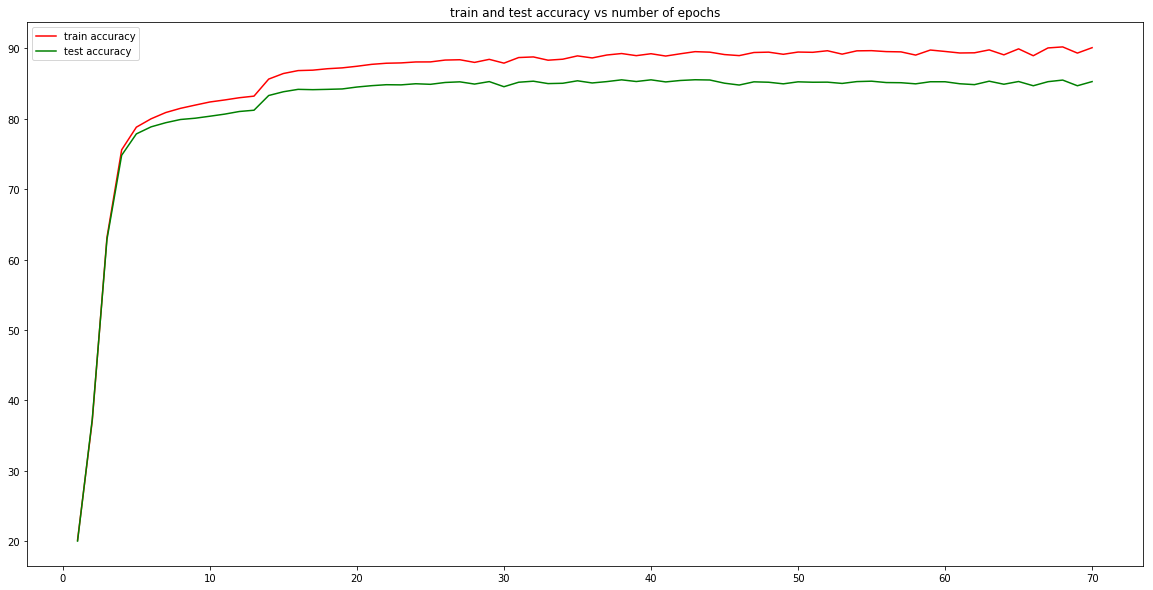

In [178]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))
plt.title("train and test accuracy vs number of epochs")
plt.plot(net.epochs,net.train_accuracy,color='r',label='train accuracy')
plt.plot(net.epochs,net.test_accuracy,'g',label = 'test accuracy')
plt.legend()
plt.show()

From this plot we can see that after 40 epochs errors are not reducing and even the accuracy comes to a constant phase.
There is no increment of accuracy in both train and validation after some point.

In [179]:
print("accuracy: ",net.check_accuracy(df_test,test_labels))

accuracy:  85.2840909090909


###### Training with one hidden layer with 1024 nodes

Used Sigmoid in hidden layer and Softmax is used in output layer. Learning rate is 0.1

In [184]:
net =Neural_NET(3, [784,1024,10], ["relu","sigmoid","softmax"], cost_func="cross_entropy",test_plot=True,test_data=df_test,test_labels=test_labels)
net.train(128,df[0:51200], labels=one_hot_targets[0:51200], epochs=100, learning_rate=0.1)

EPOCHS:  1 of  100 ==
training with  51201 of  5120029697 of  51200
Error =  4.635622757407553
EPOCHS:  2 of  100 ==
training with  51201 of  51200 5120051200
Error =  1.2824922386581776
EPOCHS:  3 of  100 ==
training with  51201 of  512001200of  5120033793 of  51200
Error =  1.7269621359137544
EPOCHS:  4 of  100 ==
training with  51201 of  51200120011393 of  51200 51200 5120051200
Error =  1.0299100329860171
EPOCHS:  5 of  100 ==
training with  51201 of  5120028033 of  51200
Error =  1.1469420716300411
EPOCHS:  6 of  100 ==
training with  51201 of  51200of  51200 27009 of  5120051200
Error =  0.6964993117742586
EPOCHS:  7 of  100 ==
training with  51201 of  51200 51200
Error =  0.6327116029356303
EPOCHS:  8 of  100 ==
training with  51201 of  51200 of  51200
Error =  0.699384474124098
EPOCHS:  9 of  100 ==
training with  51201 of  512001200 5120041601 of  51200
Error =  0.3833567729551265
EPOCHS:  10 of  100 ==
training with  51201 of  51200f  51200 51200of  51200
Error =  0.395480337

EPOCHS:  83 of  100 ==
training with  51201 of  5120051200 of  51200
Error =  0.11793891954389409
EPOCHS:  84 of  100 ==
training with  51201 of  512003969 of  5120034945 of  51200 of  5120051200
Error =  0.11619294683911341
EPOCHS:  85 of  100 ==
training with  51201 of  512001537 of  51200of  5120051200
Error =  0.11456923062734789
EPOCHS:  86 of  100 ==
training with  51201 of  51200
Error =  0.11305968366329884
EPOCHS:  87 of  100 ==
training with  51201 of  51200f  51200 5120051200
Error =  0.11149651051395951
EPOCHS:  88 of  100 ==
training with  51201 of  512005120041601 of  5120051200
Error =  0.10983965390819997
EPOCHS:  89 of  100 ==
training with  51201 of  51200913 of  51200of  5120051200of  5120049409 of  51200
Error =  0.10812044406149776
EPOCHS:  90 of  100 ==
training with  51201 of  5120025 of  51200
Error =  0.10636613016271979
EPOCHS:  91 of  100 ==
training with  51201 of  5120021761 of  51200 of  51200
Error =  0.10459373176006026
EPOCHS:  92 of  100 ==
training wi

In [185]:
df_test = df[51200:60000]
test_labels = one_hot_targets[51200:60000]
df_test.shape
pred = net.predict(df_test)
print("accuracy: ",net.check_accuracy(df_test,test_labels))


accuracy:  87.52272727272727


The accuracy is better with 87.52%, and there is a significant 1% increase in validation accuracy. But the training time is increased as there are 100 epochs and 1024 nodes in hidden layer. I would love to see the plot how the training and test accuracy goes with the number of epochs

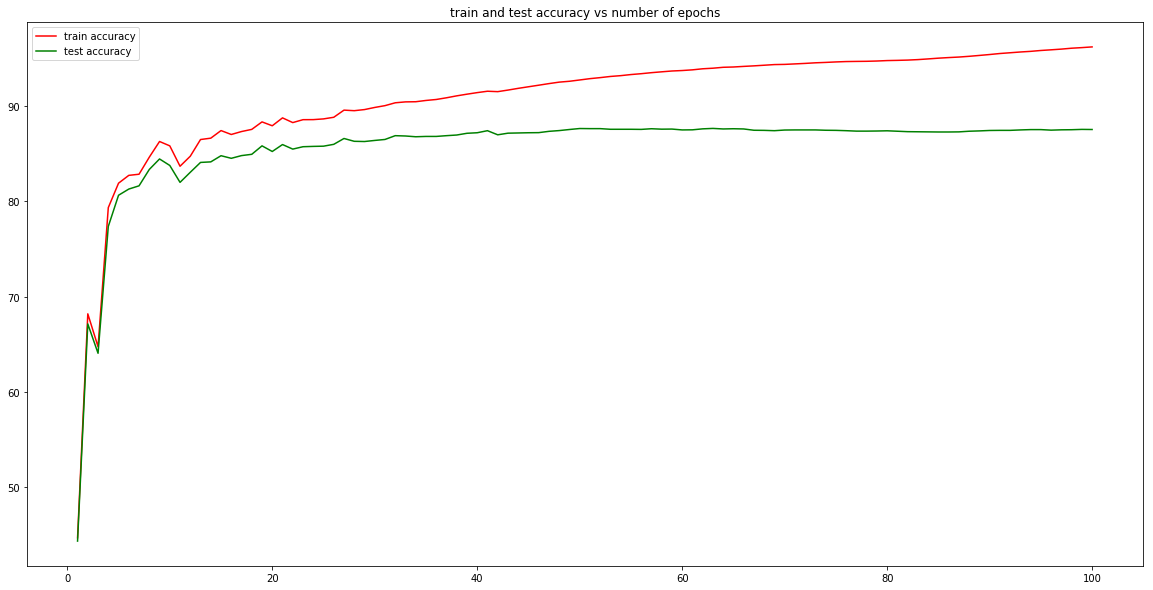

In [186]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))
plt.title("train and test accuracy vs number of epochs")
plt.plot(net.epochs,net.train_accuracy,color='r',label='train accuracy')
plt.plot(net.epochs,net.test_accuracy,'g',label = 'test accuracy')
plt.legend()
plt.show()

accuracy is better with 1024 nodes in hidden layer. But the training accuracy increases monotonically but the test accuracy is constant after a fix number of epochs

In [213]:
net =Neural_NET(3, [784,38,10], ["relu","relu","softmax"], cost_func="cross_entropy",test_plot=True,test_data=df_test,test_labels=test_labels)
net.train(128,df[0:51200], labels=one_hot_targets[0:51200], epochs=150, learning_rate=0.001)

EPOCHS:  1 of  150 ==
training with  51201 of  51200
Error =  1.9592423159928816
EPOCHS:  2 of  150 ==
training with  51201 of  51200
Error =  1.8180102411699766
EPOCHS:  3 of  150 ==
training with  51201 of  51200
Error =  1.7345239121565774
EPOCHS:  4 of  150 ==
training with  51201 of  51200
Error =  1.6738011616948547
EPOCHS:  5 of  150 ==
training with  51201 of  5120051200
Error =  1.6201334738181892
EPOCHS:  6 of  150 ==
training with  51201 of  51200
Error =  1.5668610337241864
EPOCHS:  7 of  150 ==
training with  51201 of  51200
Error =  1.511073459208438
EPOCHS:  8 of  150 ==
training with  51201 of  51200
Error =  1.4540768317055672
EPOCHS:  9 of  150 ==
training with  51201 of  51200 20353 of  51200
Error =  1.4007993066387283
EPOCHS:  10 of  150 ==
training with  51201 of  51200of  51200
Error =  1.3518098148740887
EPOCHS:  11 of  150 ==
training with  51201 of  51200
Error =  1.3030154630071742
EPOCHS:  12 of  150 ==
training with  51201 of  51200
Error =  1.2565119831061

EPOCHS:  98 of  150 ==
training with  51201 of  51200
Error =  0.4513437478738924
EPOCHS:  99 of  150 ==
training with  51201 of  51200
Error =  0.4504691611948328
EPOCHS:  100 of  150 ==
training with  51201 of  51200
Error =  0.4496424181302704
EPOCHS:  101 of  150 ==
training with  51201 of  51200
Error =  0.4488203487746368
EPOCHS:  102 of  150 ==
training with  51201 of  51200
Error =  0.4479987434146434
EPOCHS:  103 of  150 ==
training with  51201 of  51200
Error =  0.447152753851742
EPOCHS:  104 of  150 ==
training with  51201 of  51200of  51200
Error =  0.4462591102889661
EPOCHS:  105 of  150 ==
training with  51201 of  51200
Error =  0.4453785090530821
EPOCHS:  106 of  150 ==
training with  51201 of  51200
Error =  0.44449659202945757
EPOCHS:  107 of  150 ==
training with  51201 of  51200
Error =  0.4436313075990185
EPOCHS:  108 of  150 ==
training with  51201 of  51200
Error =  0.4427823917334077
EPOCHS:  109 of  150 ==
training with  51201 of  51200
Error =  0.44195834530448

Here we can see that it is not converging even at 150 epochs. The cross entropy error is near about .41 and it hasnot decreased anymore. So this model haven't converged well enough.

In [214]:
df_test = df[51200:60000]
test_labels = one_hot_targets[51200:60000]
df_test.shape
pred = net.predict(df_test)
print("accuracy: ",net.check_accuracy(df_test,test_labels))

accuracy:  84.4090909090909


We can see that even after 150 epochs the accuracy is 84.4%. Less that our previous two architechtures

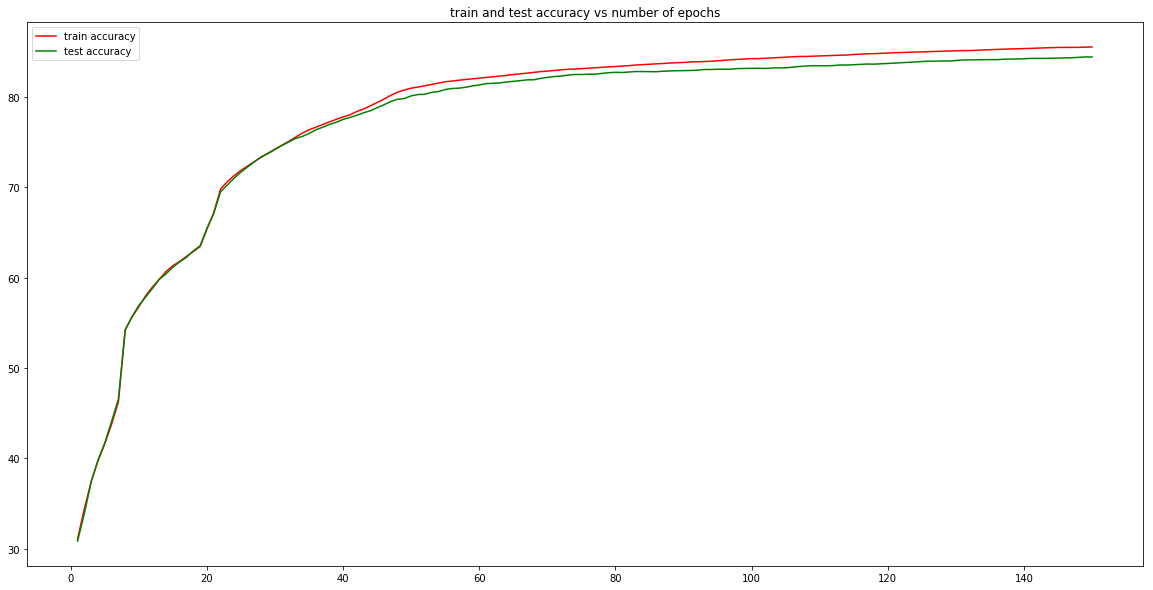

In [216]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))
plt.title("train and test accuracy vs number of epochs")
plt.plot(net.epochs,net.train_accuracy,color='r',label='train accuracy')
plt.plot(net.epochs,net.test_accuracy,'g',label = 'test accuracy')
plt.legend()
plt.show()

We can see that the increase in accuracy is constant but the pace is very slow. One thing we can do it increase the learning rate and see how it goes. 

##### Training with 2048 nodes in one hidden layer. Used Sigmoid and Softmax in respective layers

In [217]:
net =Neural_NET(3, [784,2048,10], ["relu","sigmoid","softmax"], cost_func="cross_entropy",test_plot=True,test_data=df_test,test_labels=test_labels)
net.train(128,df[0:51200], labels=one_hot_targets[0:51200], epochs=150, learning_rate=0.1)

EPOCHS:  1 of  150 ==
training with  51201 of  51200 51200 512005120051200
Error =  7.148063332141601
EPOCHS:  2 of  150 ==
training with  51201 of  5120014721 of  5120051200
Error =  4.741431187092488
EPOCHS:  3 of  150 ==
training with  51201 of  51200
Error =  1.9107741047441105
EPOCHS:  4 of  150 ==
training with  51201 of  512001200of  51200
Error =  1.9317379368921699
EPOCHS:  5 of  150 ==
training with  51201 of  5120051200
Error =  1.961379230099023
EPOCHS:  6 of  150 ==
training with  51201 of  51200of  51200
Error =  1.3135812550244619
EPOCHS:  7 of  150 ==
training with  51201 of  5120012005120051200 of  51200
Error =  1.6665917725227852
EPOCHS:  8 of  150 ==
training with  51201 of  51200553 of  51200 51200of  51200
Error =  1.5818992344722103
EPOCHS:  9 of  150 ==
training with  51201 of  51200
Error =  1.6478642638735463
EPOCHS:  10 of  150 ==
training with  51201 of  51200512005120051200
Error =  1.4098440561910852
EPOCHS:  11 of  150 ==
training with  51201 of  512007 o

EPOCHS:  85 of  150 ==
training with  51201 of  5120020865 of  51200512005120047489 of  51200
Error =  0.07462703611027069
EPOCHS:  86 of  150 ==
training with  51201 of  51200
Error =  0.07340304312389782
EPOCHS:  87 of  150 ==
training with  51201 of  51200
Error =  0.07745327889041743
EPOCHS:  88 of  150 ==
training with  51201 of  51200of  51200of  51200of  51200
Error =  0.08436211669042425
EPOCHS:  89 of  150 ==
training with  51201 of  51200 51200
Error =  0.07357550405802768
EPOCHS:  90 of  150 ==
training with  51201 of  5120051200
Error =  0.07319341743800217
EPOCHS:  91 of  150 ==
training with  51201 of  51200 5120048769 of  51200
Error =  0.07187248526215126
EPOCHS:  92 of  150 ==
training with  51201 of  51200of  51200of  51200
Error =  0.08441176042948993
EPOCHS:  93 of  150 ==
training with  51201 of  51200
Error =  0.06723877722184521
EPOCHS:  94 of  150 ==
training with  51201 of  5120051200of  51200
Error =  0.06976142396420919
EPOCHS:  95 of  150 ==
training with  5

The cross entropy error has reduced to 0.027 and its quite good so our model performs very well in train data. But there is a chance of overfit. Lets check how it performs on unseen data.


In [218]:
df_test = df[51200:60000]
test_labels = one_hot_targets[51200:60000]
df_test.shape
pred = net.predict(df_test)
print("accuracy: ",net.check_accuracy(df_test,test_labels))

accuracy:  87.13636363636364


Accuracy is not that good in test data according to its performance in training data.

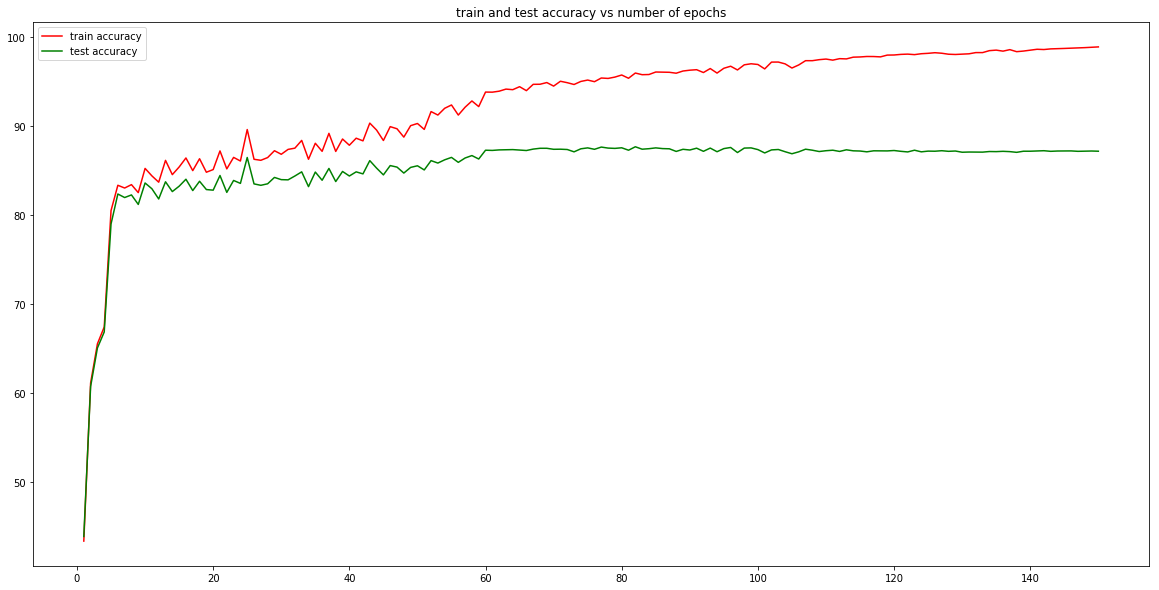

In [219]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))
plt.title("train and test accuracy vs number of epochs")
plt.plot(net.epochs,net.train_accuracy,color='r',label='train accuracy')
plt.plot(net.epochs,net.test_accuracy,'g',label = 'test accuracy')
plt.legend()
plt.show()

Here we can see that the validation accuracy is decreasing at some point. after approx 60 epochs. That means it overfits.
So we set the number of epochs to 60.

In [221]:
net =Neural_NET(3, [784,2048,10], ["relu","sigmoid","softmax"], cost_func="cross_entropy",test_plot=True,test_data=df_test,test_labels=test_labels)
net.train(128,df[0:51200], labels=one_hot_targets[0:51200], epochs=60, learning_rate=0.1)

EPOCHS:  1 of  60 ==
training with  51201 of  51200 5120051200
Error =  6.7928999929804
EPOCHS:  2 of  60 ==
training with  51201 of  51200 5120051200 51200 51200
Error =  3.2197342004427627
EPOCHS:  3 of  60 ==
training with  51201 of  51200
Error =  3.185349750825565
EPOCHS:  4 of  60 ==
training with  51201 of  51200 of  51200of  51200
Error =  1.4118626727997694
EPOCHS:  5 of  60 ==
training with  51201 of  5120033409 of  51200
Error =  2.008023705705121
EPOCHS:  6 of  60 ==
training with  51201 of  51200 of  5120051200 51200
Error =  1.0396055321645123
EPOCHS:  7 of  60 ==
training with  51201 of  51200 of  51200
Error =  1.633603875656229
EPOCHS:  8 of  60 ==
training with  51201 of  51200561 of  512009473 of  5120016769 of  51200of  51200 of  51200
Error =  0.643461791049366
EPOCHS:  9 of  60 ==
training with  51201 of  51200 5120051200
Error =  1.1811382675540818
EPOCHS:  10 of  60 ==
training with  51201 of  5120029697 of  5120051200 51200
Error =  0.7222640133700527
EPOCHS:  

In [222]:
print("accuracy: ",net.check_accuracy(df_test,test_labels))

accuracy:  85.30681818181819


### Checking the accuracy plot with 100 epochs and 512 nodes in hidden layers

In [223]:
net =Neural_NET(3, [784,512,10], ["sigmoid","sigmoid","sigmoid"], cost_func="cross_entropy",test_plot=True,test_data=df_test,test_labels=test_labels)
net.train(128,df[0:51200], labels=one_hot_targets[0:51200], epochs=100, learning_rate=0.1)

EPOCHS:  1 of  100 ==
training with  51201 of  51200f  51200of  51200 of  51200 51200
Error =  1.2170214083116184
EPOCHS:  2 of  100 ==
training with  51201 of  51200
Error =  0.7560094096141766
EPOCHS:  3 of  100 ==
training with  51201 of  51200 51200
Error =  0.5297749986708881
EPOCHS:  4 of  100 ==
training with  51201 of  5120051200
Error =  0.4876339294322766
EPOCHS:  5 of  100 ==
training with  51201 of  5120051200
Error =  0.4535961748368139
EPOCHS:  6 of  100 ==
training with  51201 of  5120013825 of  51200 51200of  51200
Error =  0.42793108951802006
EPOCHS:  7 of  100 ==
training with  51201 of  5120051200of  5120046081 of  51200
Error =  0.40893077001061845
EPOCHS:  8 of  100 ==
training with  51201 of  51200609 of  5120014209 of  5120030849 of  51200
Error =  0.39449231930770146
EPOCHS:  9 of  100 ==
training with  51201 of  51200 of  5120051200
Error =  0.3830087832827387
EPOCHS:  10 of  100 ==
training with  51201 of  5120014337 of  5120051200 51200
Error =  0.37328000493

training with  51201 of  51200of  5120051200
Error =  0.15487651254775037
EPOCHS:  86 of  100 ==
training with  51201 of  51200
Error =  0.15342236903945436
EPOCHS:  87 of  100 ==
training with  51201 of  51200
Error =  0.1520041149661141
EPOCHS:  88 of  100 ==
training with  51201 of  51200481 of  5120021761 of  51200
Error =  0.15061920636752346
EPOCHS:  89 of  100 ==
training with  51201 of  51200249 of  51200of  51200
Error =  0.14926594565666262
EPOCHS:  90 of  100 ==
training with  51201 of  51200 of  51200
Error =  0.14794350899518316
EPOCHS:  91 of  100 ==
training with  51201 of  51200of  51200
Error =  0.1466528141761856
EPOCHS:  92 of  100 ==
training with  51201 of  5120043009 of  51200
Error =  0.1453928391511371
EPOCHS:  93 of  100 ==
training with  51201 of  512001200 51200
Error =  0.14416192920698023
EPOCHS:  94 of  100 ==
training with  51201 of  51200of  51200
Error =  0.14295971266104388
EPOCHS:  95 of  100 ==
training with  51201 of  5120051200
Error =  0.141785165

The cross entropy error has reduced significantly and I hope it will perform well even with unseen data

In [226]:
print("accuracy: ",net.check_accuracy(df_test,test_labels))

accuracy:  88.22727272727273


    This architechture gives the best accuracy on test data as of now. We make this architechture our best architecture.

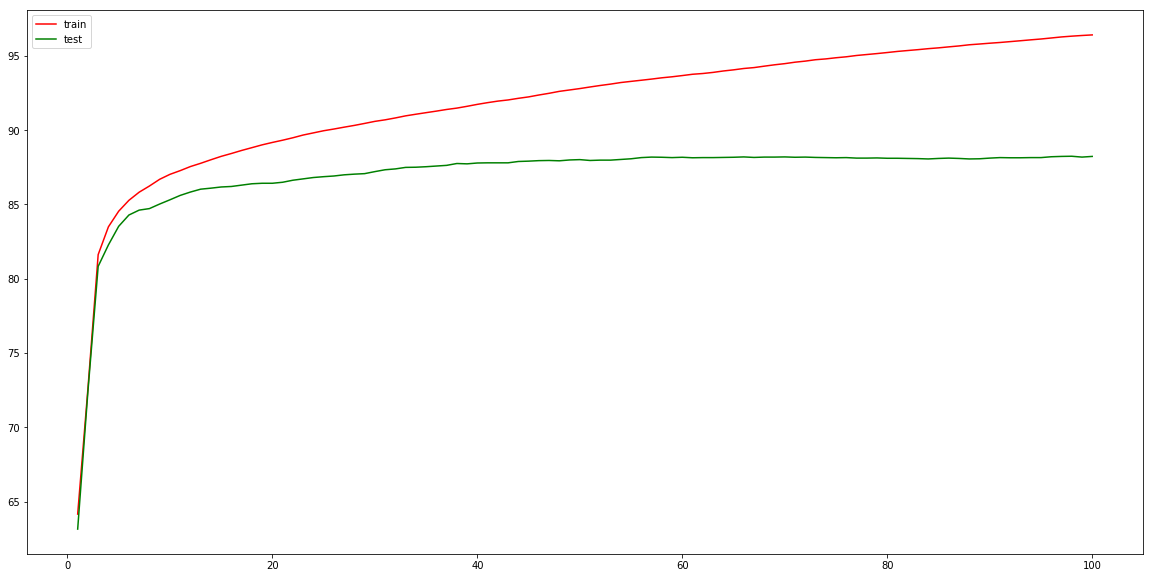

In [225]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))
plt.plot(net.epochs,net.train_accuracy,color='r',label='train')
plt.plot(net.epochs,net.test_accuracy,'g',label = 'test')
plt.legend()
plt.show()

#### This turns out to be the best performing architechture with one hidden layer and 512 nodes gives accuracy about 89 percent.

In [259]:
np.savetxt("architecture_details/weights0.txt",net.Layers[0].weights)
np.savetxt("Architecture_details/weights1.txt",net.Layers[1].weights)
np.savetxt("Architecture_details/bias0.txt",net.Layers[0].bias)
np.savetxt("Architecture_details/bias1.txt",net.Layers[1].bias)
# saving the weights and bias into files

In [265]:
#import the test file
test_sample = pd.read_csv("apparel-test.csv")
test_sample = StandardScaler().fit_transform(test_sample)
print(test_sample.shape)


(9674, 784)


In [272]:
pred = net.predict(test_sample)
pred = [np.where(r==1)[0][0] for r in pred]
pred
np.savetxt("2018201010_apparel_prediction.csv",pred,fmt="%d") #saving the predictions

## Question 2

In [235]:
import pandas as pd
train = pd.read_csv("house_price/train.csv")
test = pd.read_csv("house_price/test.csv")
print(train.shape)
train.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [236]:


train.drop('Id',axis = 1, inplace = True)
train_numerical = train.select_dtypes(exclude=['object'])
train_numerical.fillna(0,inplace = True)
train_categoric = train.select_dtypes(include=['object'])
train_categoric.fillna('NONE',inplace = True)
train = train_numerical.merge(train_categoric, left_index = True, right_index = True) 


ID = test.Id
test.drop('Id',axis = 1, inplace = True)
test_numerical = test.select_dtypes(exclude=['object'])
test_numerical.fillna(0,inplace = True)
test_categoric = test.select_dtypes(include=['object'])
test_categoric.fillna('NONE',inplace = True)
test = test_numerical.merge(test_categoric, left_index = True, right_index = True) 

In [237]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples = 100, random_state = 42)
clf.fit(train_numerical)
y_noano = clf.predict(train_numerical)
y_noano = pd.DataFrame(y_noano, columns = ['Top'])
y_noano[y_noano['Top'] == 1].index.values

train_numerical = train_numerical.iloc[y_noano[y_noano['Top'] == 1].index.values]
train_numerical.reset_index(drop = True, inplace = True)

train_categoric = train_categoric.iloc[y_noano[y_noano['Top'] == 1].index.values]
train_categoric.reset_index(drop = True, inplace = True)

train = train.iloc[y_noano[y_noano['Top'] == 1].index.values]
train.reset_index(drop = True, inplace = True)

In [239]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
col_train_num = list(train_numerical.columns)
col_train_num_bis = list(train_numerical.columns)

col_train_cat = list(train_categoric.columns)

col_train_num_bis.remove('SalePrice')

mat_train = np.matrix(train_numerical)
mat_test  = np.matrix(test_numerical)
mat_new = np.matrix(train_numerical.drop('SalePrice',axis = 1))
mat_y = np.array(train.SalePrice)

prepro_y = MinMaxScaler()
prepro_y.fit(mat_y.reshape(1314,1))

prepro = MinMaxScaler()
prepro.fit(mat_train)

prepro_test = MinMaxScaler()
prepro_test.fit(mat_new)

train_num_scale = pd.DataFrame(prepro.transform(mat_train),columns = col_train)
test_num_scale  = pd.DataFrame(prepro_test.transform(mat_test),columns = col_train_bis)
train_num_scale.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.235294,0.207668,0.062802,0.625,0.428571,0.953488,0.883333,0.12250,0.416274,0.0,...,0.000000,0.167582,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,0.403057
1,0.000000,0.255591,0.072904,0.500,0.857143,0.744186,0.433333,0.00000,0.576651,0.0,...,0.404891,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,0.340220
2,0.235294,0.217252,0.087396,0.625,0.428571,0.937984,0.866667,0.10125,0.286557,0.0,...,0.000000,0.115385,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,0.437966
3,0.294118,0.191693,0.072464,0.625,0.428571,0.271318,0.333333,0.00000,0.127358,0.0,...,0.000000,0.096154,0.824242,0.0,0.0,0.0,0.0,0.090909,0.00,0.243639
4,0.235294,0.268371,0.113835,0.750,0.428571,0.930233,0.833333,0.21875,0.386203,0.0,...,0.260870,0.230769,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,0.499638


In [242]:
train[col_train_num] = pd.DataFrame(prepro.transform(mat_train),columns = col_train_num)
test[col_train_num_bis]  = test_num_scale
test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,0.000000,0.255591,0.090664,0.375,0.571429,0.627907,0.183333,0.0000,0.275943,0.097693,...,Attchd,Unf,TA,TA,Y,NONE,MnPrv,NONE,WD,Normal
1,0.000000,0.258786,0.113896,0.500,0.571429,0.604651,0.133333,0.0675,0.544222,0.000000,...,Attchd,Unf,TA,TA,Y,NONE,NONE,Gar2,WD,Normal
2,0.235294,0.236422,0.110058,0.375,0.428571,0.906977,0.800000,0.0000,0.466392,0.000000,...,Attchd,Fin,TA,TA,Y,NONE,MnPrv,NONE,WD,Normal
3,0.235294,0.249201,0.076224,0.500,0.571429,0.914729,0.800000,0.0125,0.354953,0.000000,...,Attchd,Fin,TA,TA,Y,NONE,NONE,NONE,WD,Normal
4,0.588235,0.137380,0.032543,0.750,0.428571,0.868217,0.700000,0.0000,0.155071,0.000000,...,Attchd,RFn,TA,TA,Y,NONE,NONE,NONE,WD,Normal


### Report 

1. I have shown the steps of preprocessing above.
> split into two parts 

a. Set with only numerical features
b. Set with only categorical features

> Normalise the numerical features as gradient descent will not work well if the features are not scaled.

> One hot encode the categorical features(dimensions of the data will increase.

> Remove the outliers.

> Merge the two sets and create new train data

> Do the above steps for test data also

2. The output layer will contain only one node as it is a regression problem.

3. We should use a linear activation function (ReLU or Leaky ReLU) in the output layer.

4. Hidden layers may contain relu, sigmoid, softmax or tanh as activation function.

5. Increase the number of hidden layers if the model does not seems to converge.

6. As it is a hard problem we might have to use more feature engineering. 

7. The cost function is different in case of regression, we can use least mean squares.





                                                                                               By-
                                                                                                Souparna Das
                                                                                             ROLL No. 2018201010
                                                                                               IIIT HYDERABAD
                                                                                                26 Feb, 2019
                                                                                               